### Data loading, cleaning, and exploring

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/test_data.csv')

In [9]:
print(df.shape)
df.head(3)

(1901, 11)


,key,birth_year,gender,ideo,race_4,edu,employ,party,income_pct,activist_pct,target
0,1,1962,male,-1,Latinx,non-college,1.0,Dem,0.344895,0.856431,NaN
1,2,1972,female,-1,Latinx,non-college,1.0,Rep,0.249648,0.679858,NaN
2,3,1962,female,1,White,college,1.0,Dem,-1.709919,0.419254,0.0


In [19]:
df.dtypes

key               int64
birth_year        int64
gender           object
ideo              int64
race_4           object
edu              object
employ          float64
party            object
income_pct      float64
activist_pct    float64
target          float64
dtype: object

In [6]:
df.isnull().sum()

key               0
birth_year        0
gender            0
ideo              0
race_4          390
edu             400
employ          404
party           496
income_pct        0
activist_pct      0
target          917
dtype: int64

In [119]:
# Calculate the percentage of missing values in each variable
# why? to select a best way to impute missing values

for k in list(df.isnull().sum().index):
    if df.isnull().sum()[k]!=0:
        print( f"{k}:  {round((df.isnull().sum()[k] / df.shape[0]) * 100, 2)} % . Type: {df[k].dtype}")

race_4:  20.52 % . Type: object
edu:  21.04 % . Type: object
employ:  21.25 % . Type: float64
party:  26.09 % . Type: object
target:  48.24 % . Type: float64


In [130]:
# Value counts for each variable, to see next best way to encode them
temp = df.select_dtypes(include = ['object'])
for k in temp.columns:
    print(k)
    print('---')
    print(temp[k].value_counts(dropna = False))
    print('***************')

gender
---
female    1023
male       878
Name: gender, dtype: int64
***************
race_4
---
White     1027
NaN        390
Latinx     231
Black      128
Other      125
Name: race_4, dtype: int64
***************
edu
---
college        1000
non-college     501
NaN             400
Name: edu, dtype: int64
***************
party
---
Dem    717
Rep    688
NaN    496
Name: party, dtype: int64
***************


In [133]:
# one-hot encoding object variables, so we have all numerical values, so to include them in predictions:
temp = pd.get_dummies(temp, dummy_na=True)

In [138]:
# dropping the null columns to reduce complexity, and multi-collinearity
for k in temp.columns:
    if 'nan' in k:
        temp.drop(k, axis = 1, inplace=True)

In [141]:
temp.head(2)

,gender_female,gender_male,race_4_Black,race_4_Latinx,race_4_Other,race_4_White,edu_college,edu_non-college,party_Dem,party_Rep
0,0,1,0,1,0,0,0,1,1,0
1,1,0,0,1,0,0,0,1,0,1


In [146]:
# dropping the original object columns from the original dataframe, so to prepare to merge the encoded ones
object_types = list(df.select_dtypes(include = ['object']).columns)
df.drop(object_types, axis = 1, inplace = True)

In [148]:
# merging the encoded variables
df = pd.concat([df, temp], axis = 1)

In [152]:
print(df.shape)
df.head(2)

(1901, 17)


,key,birth_year,ideo,employ,income_pct,activist_pct,target,gender_female,gender_male,race_4_Black,race_4_Latinx,race_4_Other,race_4_White,edu_college,edu_non-college,party_Dem,party_Rep
0,1,1962,-1,1.0,0.344895,0.856431,NaN,0,1,0,1,0,0,0,1,1,0
1,2,1972,-1,1.0,0.249648,0.679858,NaN,1,0,0,1,0,0,0,1,0,1


In [156]:
df.isnull().sum()

key                  0
birth_year           0
ideo                 0
employ             404
income_pct           0
activist_pct         0
target             917
gender_female        0
gender_male          0
race_4_Black         0
race_4_Latinx        0
race_4_Other         0
race_4_White         0
edu_college          0
edu_non-college      0
party_Dem            0
party_Rep            0
dtype: int64

In [160]:
df['employ'].value_counts()

0.0    773
1.0    724
Name: employ, dtype: int64

In [167]:
# dummying the 'employ' variable
employ_dummies = pd.get_dummies(df['employ'], dummy_na=True, prefix='employ').drop('employ_nan', axis = 1)

In [170]:
# merging it with the original dataframe, and dropping the old 'employ' column
df.drop('employ', axis = 1, inplace = True)
df = pd.concat([df, employ_dummies], axis = 1)

In [173]:
print(df.shape)
df.head(2)

(1901, 18)


,key,birth_year,ideo,income_pct,activist_pct,target,gender_female,gender_male,race_4_Black,race_4_Latinx,race_4_Other,race_4_White,edu_college,edu_non-college,party_Dem,party_Rep,employ_0.0,employ_1.0
0,1,1962,-1,0.344895,0.856431,NaN,0,1,0,1,0,0,0,1,1,0,0,1
1,2,1972,-1,0.249648,0.679858,NaN,1,0,0,1,0,0,0,1,0,1,0,1


In [ ]:
# visualizing distributions of each variable

In [18]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

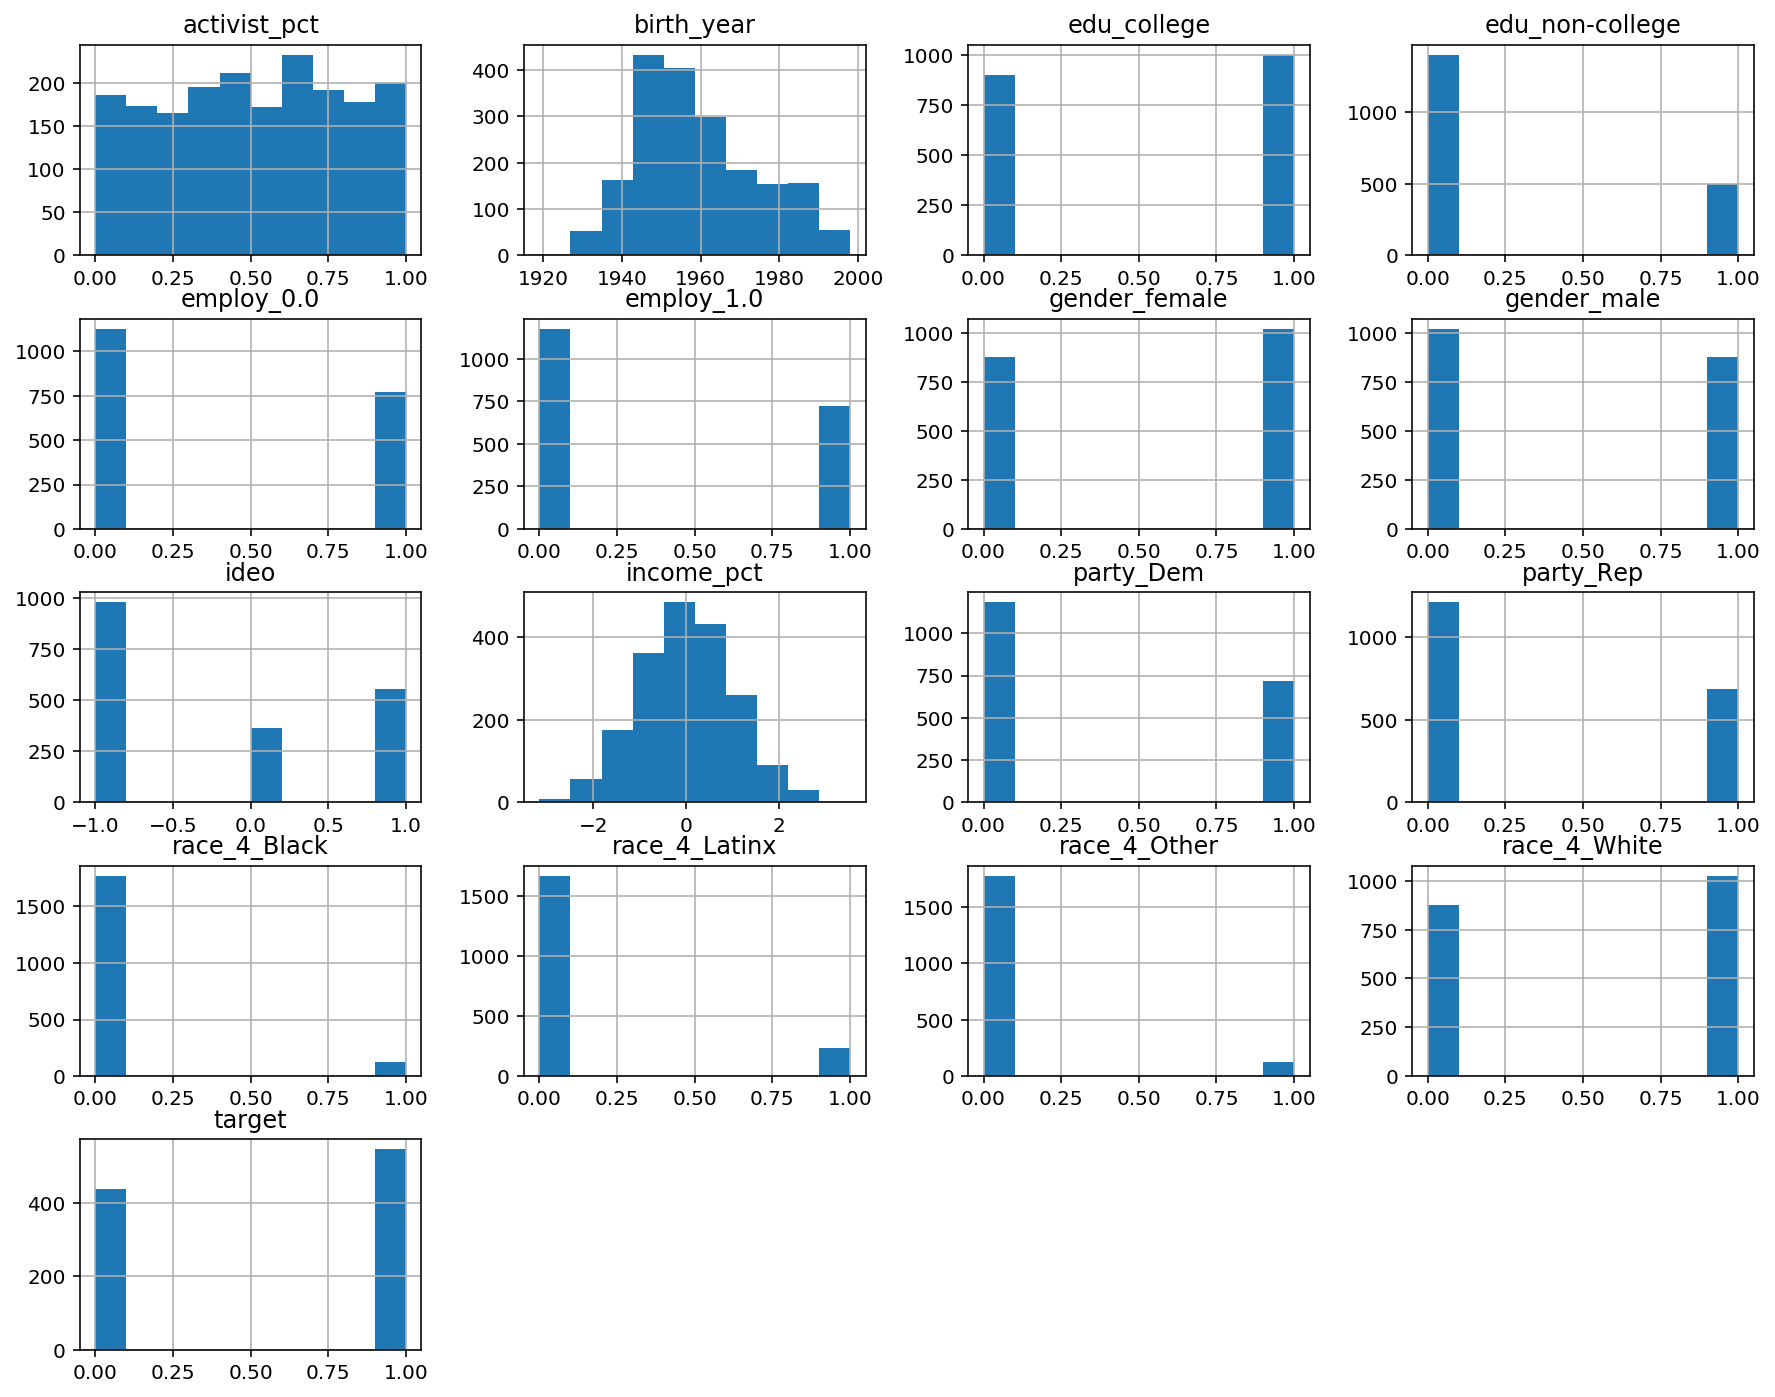

In [176]:
df.drop('key', axis = 1).hist(figsize = (15, 12));

In [215]:
# The test data frame is the one which 'target' is null, that is what we need to predict and fill out
test_df = df.copy()

In [215]:
test_df = test_df.loc[test_df['target'].isnull(), :]

In [215]:
test_df.drop('target', axis = 1, inplace = True)

In [220]:
# and so, the training dataframe is:
train_df = df.loc[df['target'].notnull(), :]

In [224]:
print(test_df.shape,  train_df.shape)

(917, 17) (984, 18)


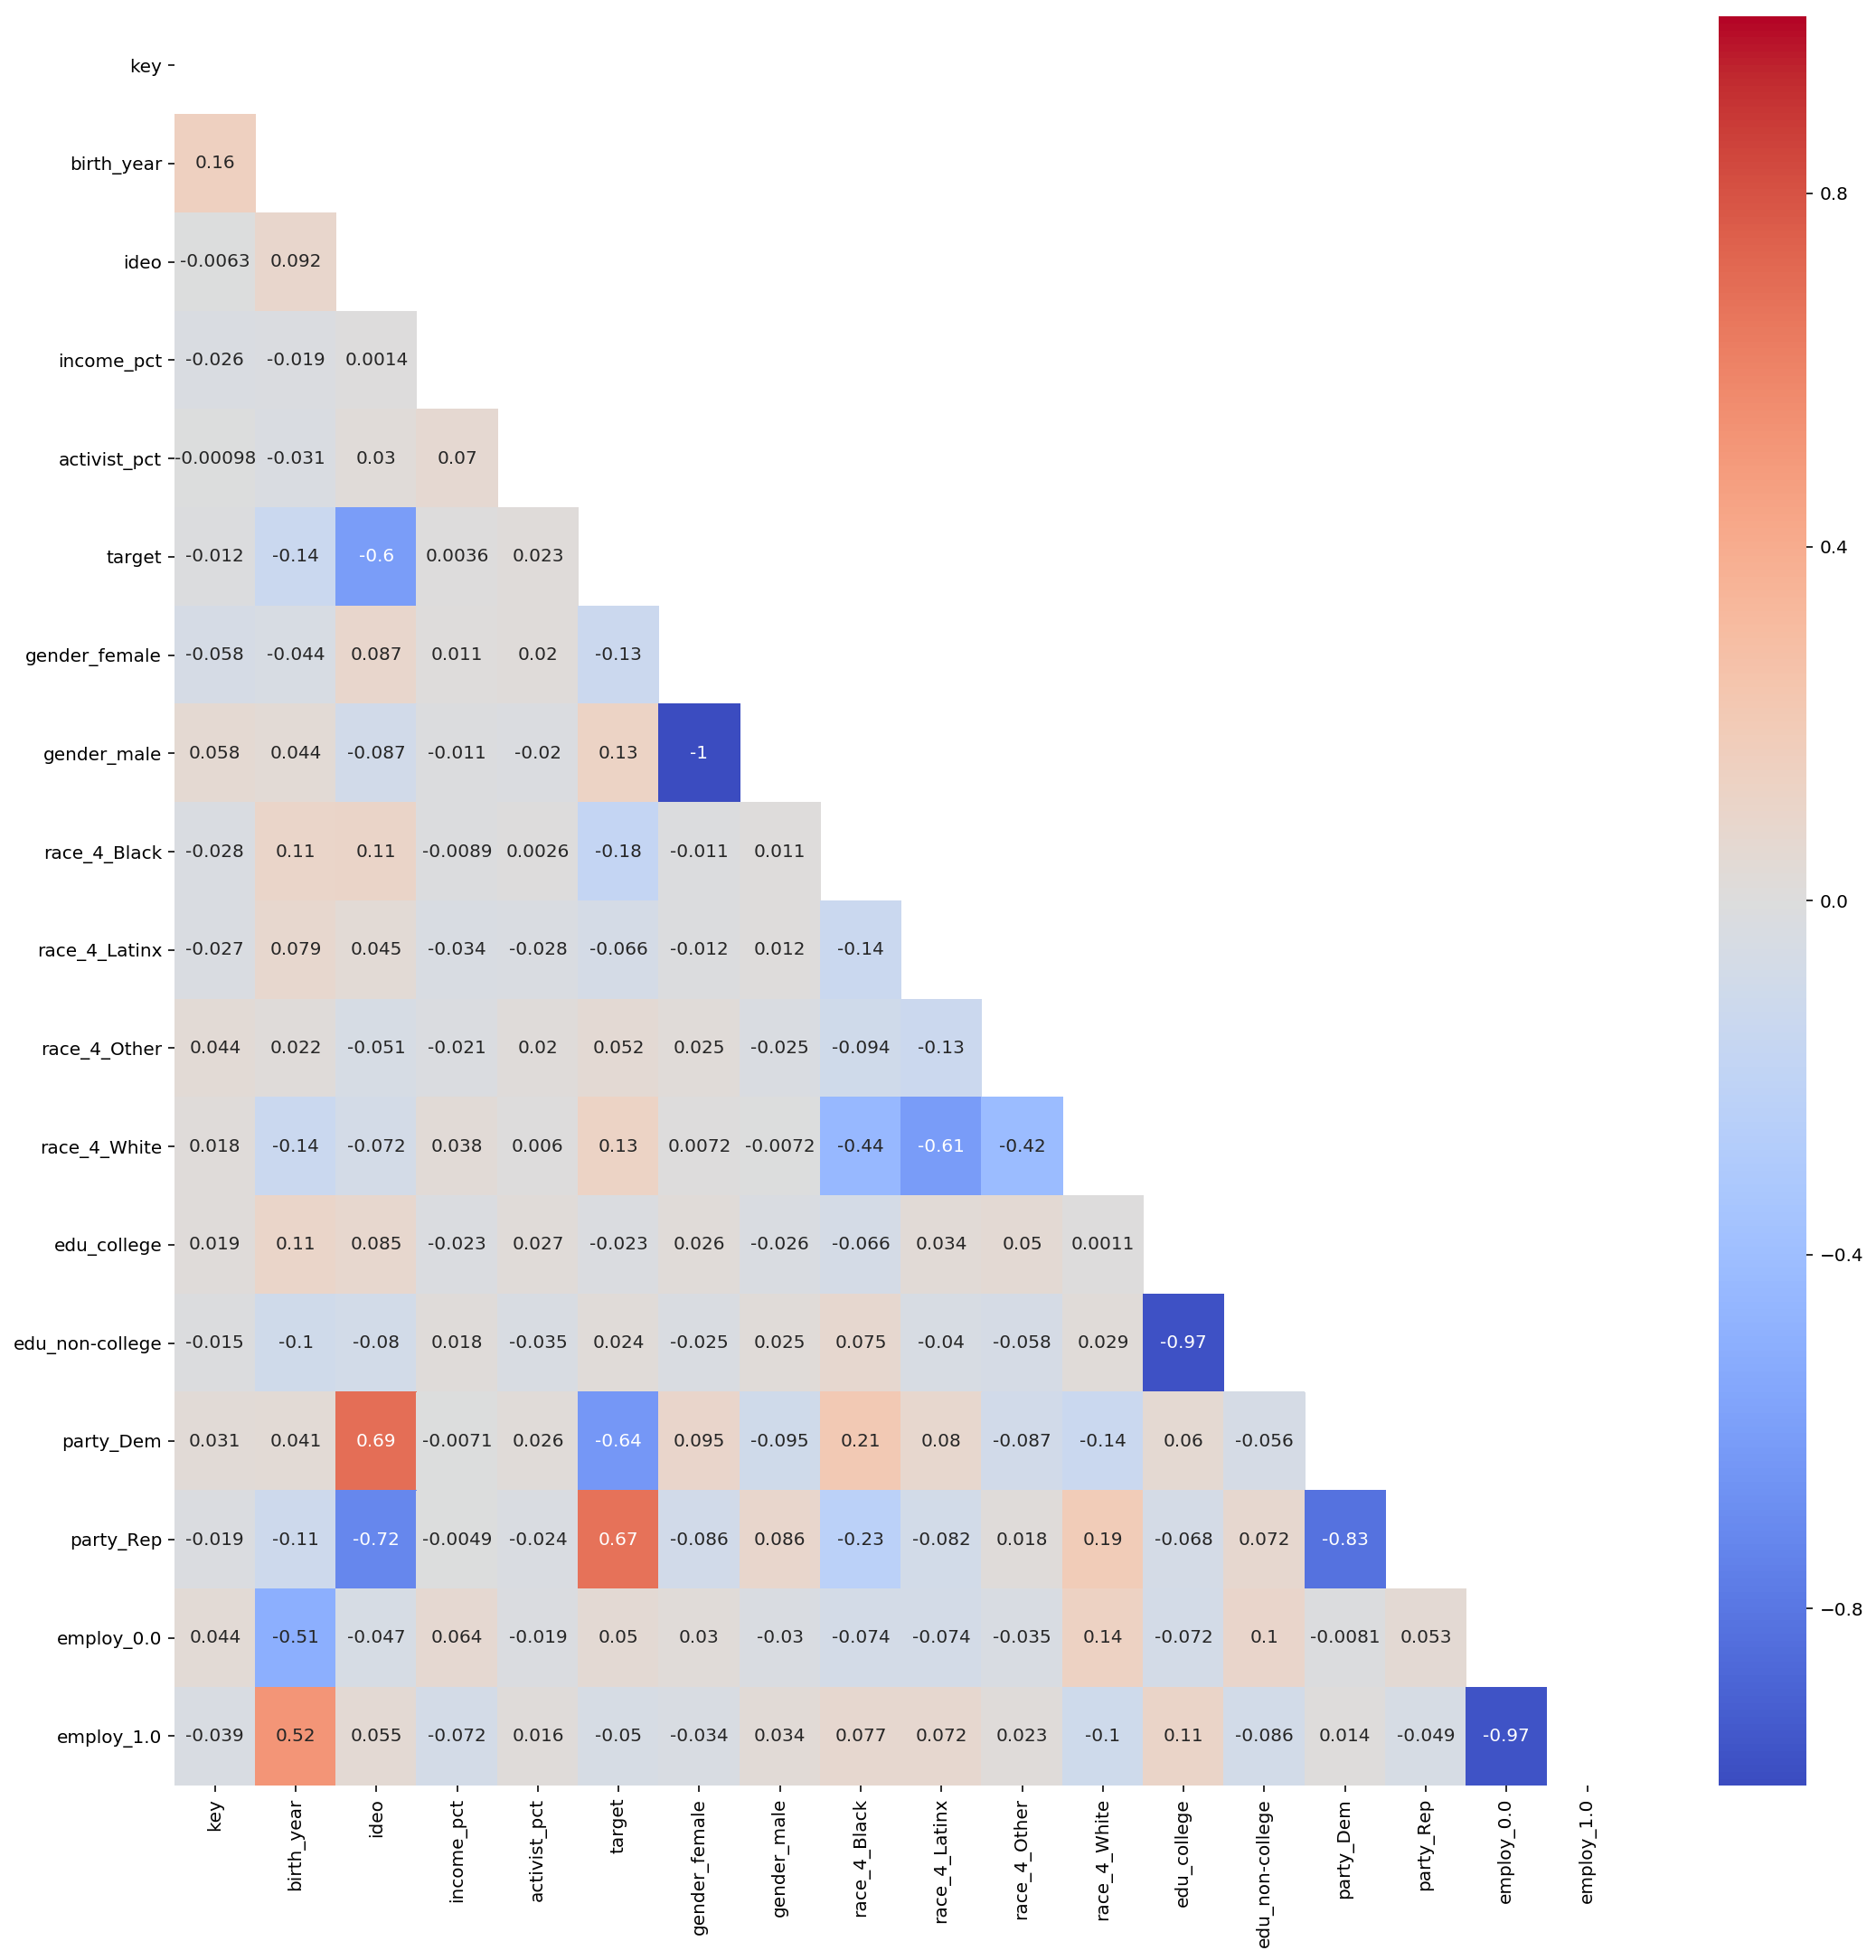

In [235]:
# plotting a heatmap to visualize correlations
import seaborn as sns
import numpy as np

plt.figure(figsize = (18,18))

mask = np.zeros_like(train_df.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train_df.corr(), vmax = 1, vmin = -1, cmap = 'coolwarm', annot = True, mask = mask);

### Analysis and more visualization
We saw in the heatmap that the 'ideo' and 'party' have strong correlation with the target. For sake of visualization simplicity, we will take the mean of these variables and plot them against the target, to see which party affiliation has more individuals opposing the ballot

In [563]:
def plot_bars(what, target = train_df['target']):
    """
    Returns bar plot by the code: train_df[what].groupby(target).mean().plot(kind = 'bar')
    
    Parameters:
    -----------
    what: a list of column names of 'train_df' 
    target: what is grouped by, entered as 'train_df['col_name']'
    """
    return train_df[what].groupby(target).mean().plot(kind = 'bar');

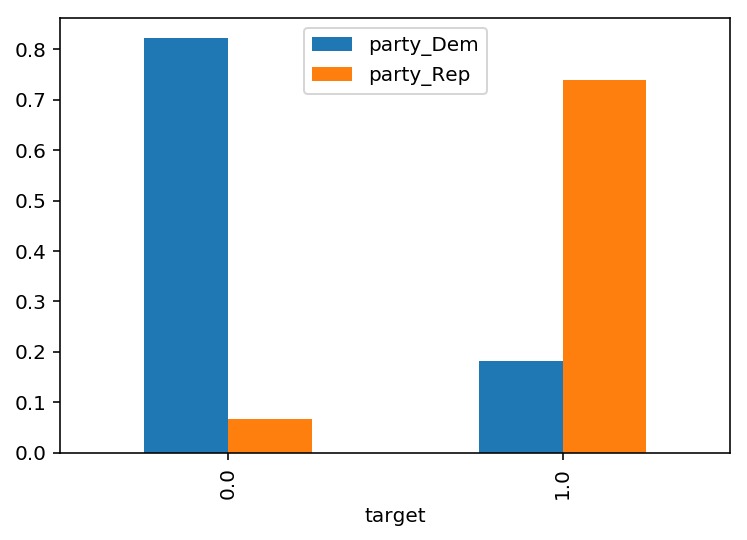

In [562]:
plot_bars(['party_Dem', 'party_Rep']);

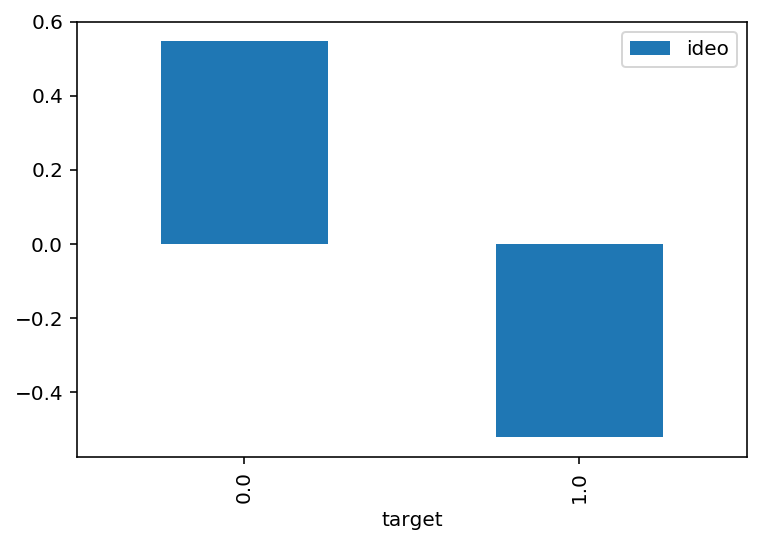

In [567]:
plot_bars(['ideo']);

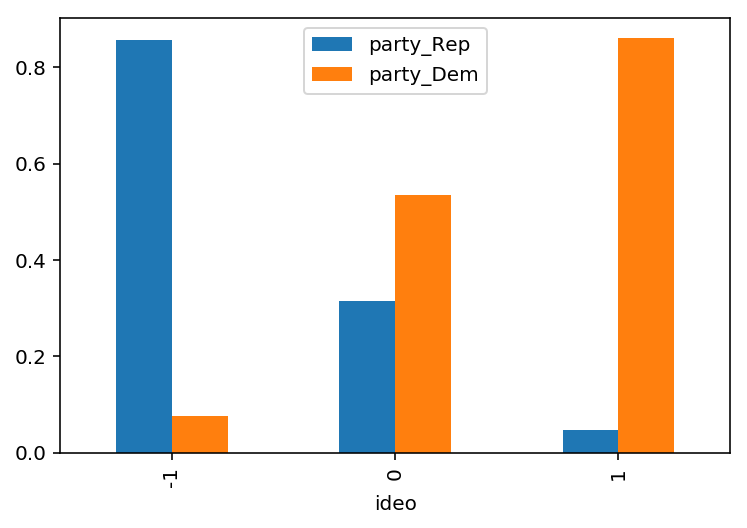

In [572]:
# which ideo is associated with which party?
plot_bars(['party_Rep', 'party_Dem'], target = train_df['ideo']);

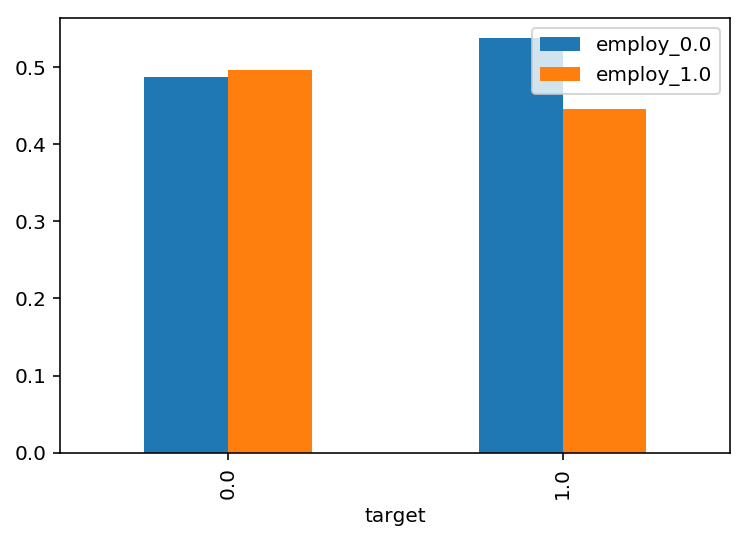

In [574]:
plot_bars(['employ_0.0', 'employ_1.0']);

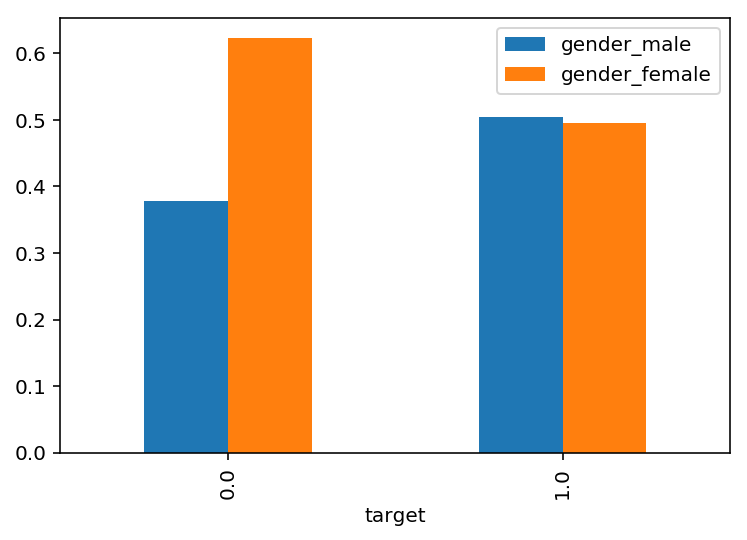

In [577]:
plot_bars(['gender_male', 'gender_female']);

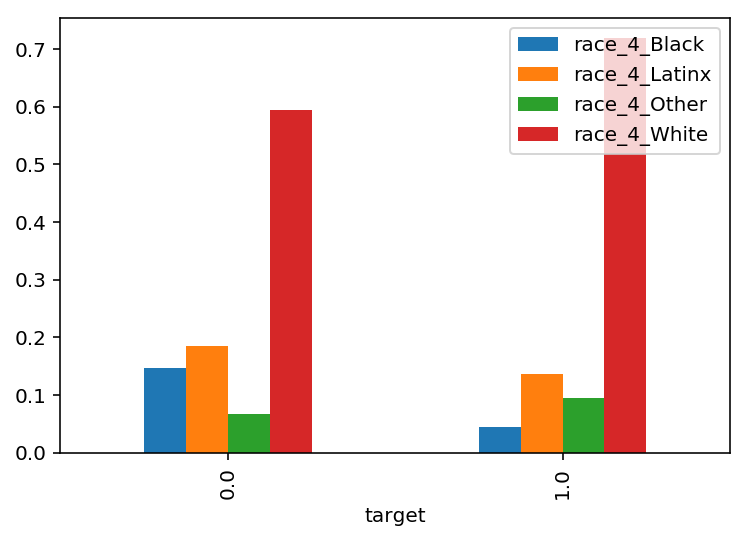

In [578]:
plot_bars(['race_4_Black','race_4_Latinx','race_4_Other','race_4_White']);

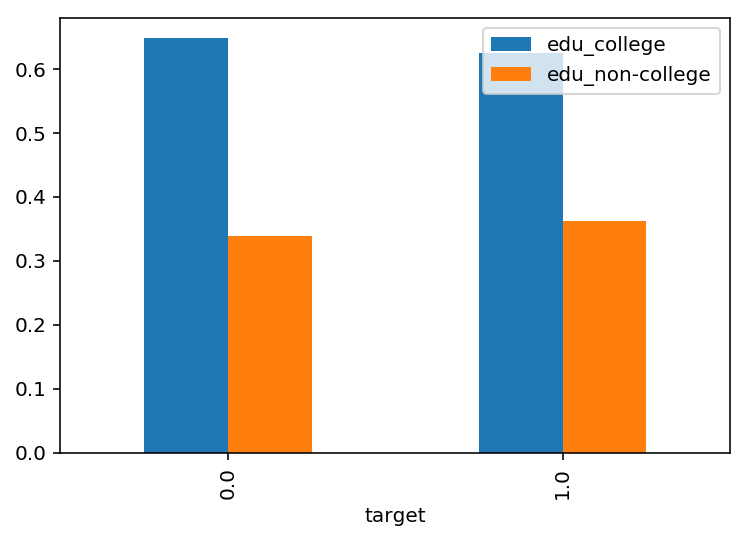

In [586]:
plot_bars(['edu_college','edu_non-college']);

### Modeling with random forest

In [237]:
# checking baseline accuracy
train_df['target'].value_counts(normalize = True)

1.0    0.555894
0.0    0.444106
Name: target, dtype: float64

In [239]:
# train/test/split to evaluate our models before applying them to the testing dataframe
X = train_df.drop(['target'], axis = 1)
y = train_df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30, stratify = y)

In [251]:
# setting up a random forest classifier, because random forests known to perform best
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Preliminary search was done with RandomizedSearchCV over more parameters choices than listed, a couple of times, to see which parameters range are being picked up as better, then a GridSearchCV is done to cover all possible combinations.

In [293]:
rf = RandomForestClassifier()

In [294]:
rf_params = {
    'n_estimators' : [200, 250],
    'max_depth' : [2, 3, 7],
    'max_features' : ['log2', None], 
    'min_samples_split' : [2, 3] 
}

In [289]:
rs = RandomizedSearchCV(rf, param_distributions = rf_params, cv = 5, n_iter = 50)

In [290]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'n_estimators': [100, 150, 200, 250], 'max_depth': [2, 3, 5, 10], 'max_features': ['auto', 'log2', None], 'min_samples_split': [2, 3, 6], 'min_samples_leaf': [1, 2, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [291]:
rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 3}

In [295]:
gs = GridSearchCV(rf, param_grid = rf_params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 250], 'max_depth': [2, 3, 7], 'max_features': ['log2', None], 'min_samples_split': [2, 3, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [296]:
gs.best_params_

{'max_depth': 3,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 250}

In [300]:
y_pred = gs.predict(X_test)

In [301]:
f1_score(y_test, y_pred).round(4)

0.8417

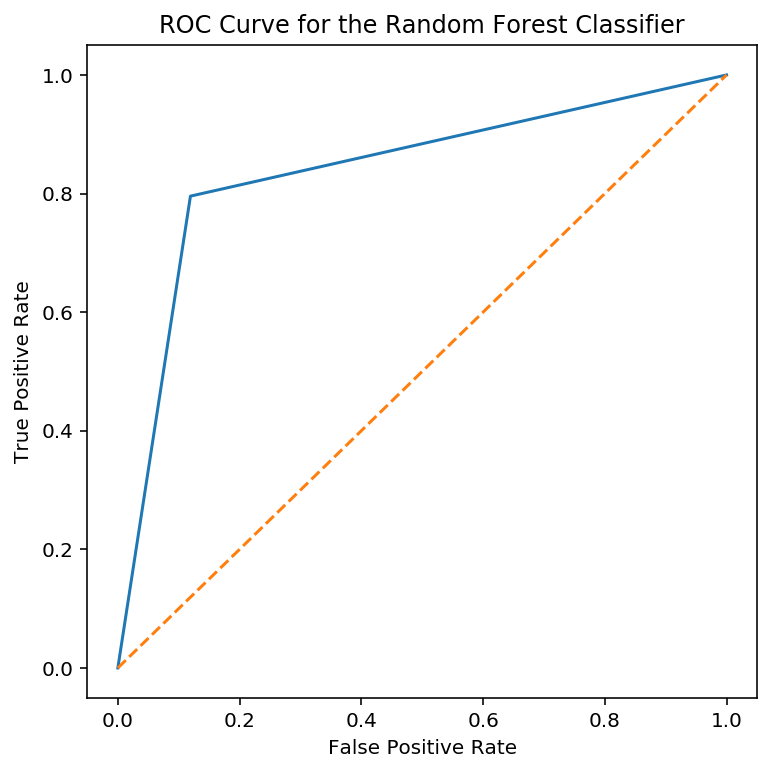

In [302]:
# plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr)
plt.plot([0, max(y_test)], [0, max(y_test)], '--')
plt.title('ROC Curve for the Random Forest Classifier')
plt.xlabel('false positive rate'.title())
plt.ylabel('true positive rate'.title());

In [404]:
from sklearn.metrics import confusion_matrix, classification_report
pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Negative', 'Predicted Positive'], 
            index = ['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,96,13
Actual Positive,28,109


In [405]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Neg: {tn}, False Pos: {fp}, False Neg: {fn}, True Pos: {tp}")

True Neg: 96, False Pos: 13, False Neg: 28, True Pos: 109


In [406]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       109
         1.0       0.89      0.80      0.84       137

   micro avg       0.83      0.83      0.83       246
   macro avg       0.83      0.84      0.83       246
weighted avg       0.84      0.83      0.83       246



### Predicting with Gradient Boosting
Note: boosted random forests gave the same score as RandomForestClassifier, even with GridSearch

In [504]:
from xgboost import XGBClassifier

In [505]:
boosted = XGBClassifier()

In [506]:
boosted_params = {
    'max_depth' : [2, 3, 6], 
    'learning_rate' : [.5, 1], 
    'n_estimators' : [200, 250], 
    'gamma' : [0, .2, .5], 
    'subsample': [1, .2, .7], 
    'colsample_bytree' : [1, .2, .6], 
    'reg_alpha': [0, .2, .6, 1],
    'reg_lambda': [0, .2, .6, 1]
}

In [508]:
boosted_rs = RandomizedSearchCV(boosted, param_distributions = boosted_params, n_iter = 50, cv = 5)

In [509]:
boosted_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'max_depth': [2, 3, 6], 'learning_rate': [0.5, 1], 'n_estimators': [200, 250], 'gamma': [0, 0.2, 0.5], 'subsample': [1, 0.2, 0.7], 'colsample_bytree': [1, 0.2, 0.6], 'reg_alpha': [0, 0.2, 0.6, 1], 'reg_lambda': [0, 0.2, 0.6, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [510]:
boosted_rs.best_params_

{'subsample': 1,
 'reg_lambda': 0.2,
 'reg_alpha': 1,
 'n_estimators': 250,
 'max_depth': 3,
 'learning_rate': 0.5,
 'gamma': 0,
 'colsample_bytree': 0.6}

In [512]:
f1_score(y_test, boosted_rs.predict(X_test)).round(4)

0.7879

### Predicting with a neural network
We have too few data points, so a neural network won't give us better predictions, but just to see it

In [303]:
from keras.models import Sequential
from keras.layers import Dense

In [313]:
# scaling the data (subtract the mean and divide by standard deviation of each variable)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [314]:
x_train = ss.fit_transform(X_train)
x_test = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [379]:
model = Sequential()

model.add(Dense(32, activation  = 'relu', input_shape = (x_train.shape[1], )))

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))

model.add(Dense(1, activation  = 'sigmoid'))

In [380]:
model.compile(optimizer = 'adam', 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

In [381]:
history = model.fit(x_train, y_train, 
                   epochs = 9, 
                   batch_size = 64, 
                   validation_data = (x_test, y_test))

Train on 738 samples, validate on 246 samples
Epoch 1/9
738/738 [==============================] - 2s 3ms/step - loss: 0.7149 - acc: 0.4580 - val_loss: 0.6631 - val_acc: 0.6301
Epoch 2/9
738/738 [==============================] - 0s 43us/step - loss: 0.6394 - acc: 0.6477 - val_loss: 0.6057 - val_acc: 0.7602
Epoch 3/9
738/738 [==============================] - 0s 46us/step - loss: 0.5738 - acc: 0.7602 - val_loss: 0.5494 - val_acc: 0.7886
Epoch 4/9
738/738 [==============================] - 0s 48us/step - loss: 0.5055 - acc: 0.8279 - val_loss: 0.4955 - val_acc: 0.8211
Epoch 5/9
738/738 [==============================] - 0s 51us/step - loss: 0.4409 - acc: 0.8401 - val_loss: 0.4639 - val_acc: 0.8252
Epoch 6/9
738/738 [==============================] - 0s 53us/step - loss: 0.4032 - acc: 0.8564 - val_loss: 0.4481 - val_acc: 0.8171
Epoch 7/9
738/738 [==============================] - 0s 53us/step - loss: 0.3824 - acc: 0.8523 - val_loss: 0.4547 - val_acc: 0.8211
Epoch 8/9
738/738 [============

In [382]:
model.evaluate(x_test, y_test)

246/246 [==============================] - 0s 41us/step


[0.46740297137237174, 0.8252032500941578]

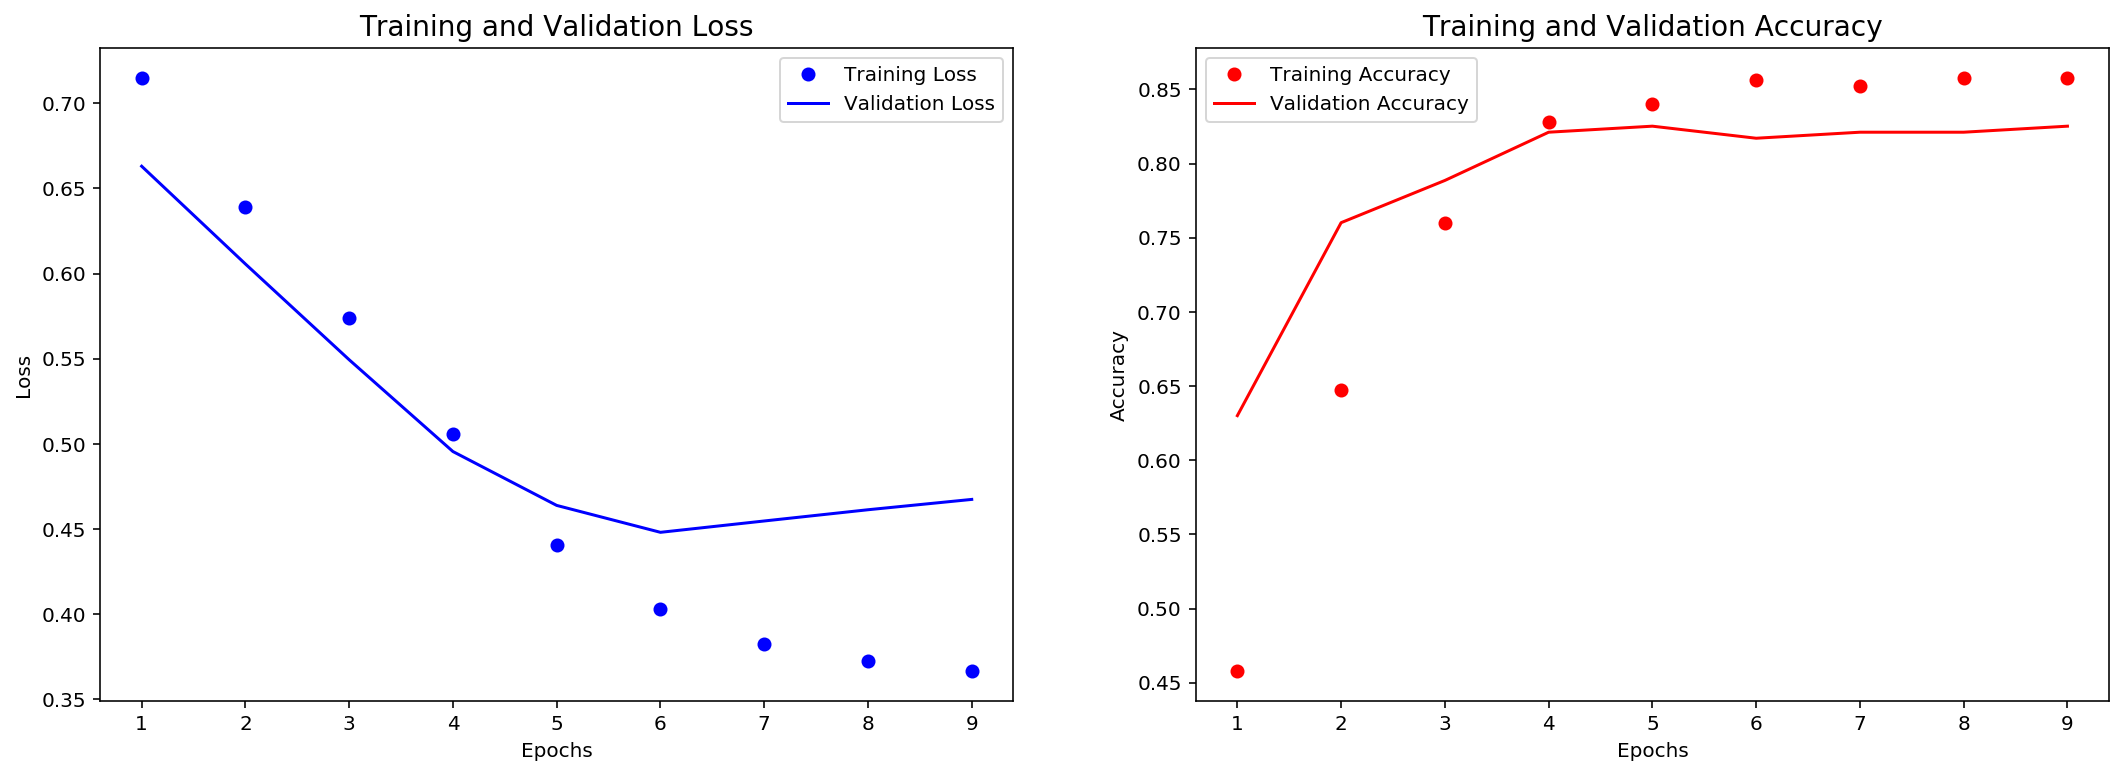

In [383]:
epochs = range(1, len(history.history['loss']) + 1)

fig, ax = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 2)

ax[0].plot(epochs, history.history['loss'], 'bo', label = 'Training Loss')
ax[0].plot(epochs, history.history['val_loss'], 'b', label = 'Validation Loss')
ax[0].set_title('Training and Validation Loss', fontsize = 14)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_xticks(epochs)
ax[0].legend();

ax[1].plot(epochs, history.history['acc'], 'ro', label = 'Training Accuracy')
ax[1].plot(epochs, history.history['val_acc'], 'r', label = 'Validation Accuracy')
ax[1].set_title('Training and Validation Accuracy', fontsize = 14)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_xticks(epochs)
ax[1].legend();

### Modeling with SVM
It probably won't outperform the Random Forest model
<br />Instead of using a pipeline to standarize data, I'm going to use the data we standarize above

In [384]:
from sklearn.svm import SVC

In [386]:
svc = SVC(gamma = 'auto') 

In [387]:
svc_params = {
    'C' : [1.0, .05, 1.7],
    'kernel' : ['rbf', 'linear', 'sigmoid', 'poly']
}

In [388]:
svc_gs = GridSearchCV(svc, param_grid = svc_params, cv = 5)

In [389]:
svc_gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 0.05, 1.7], 'kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [390]:
svc_gs.best_params_

{'C': 0.05, 'kernel': 'sigmoid'}

In [391]:
svc_y_pred = svc_gs.predict(x_test)

In [396]:
f1_score(y_test, svc_y_pred).round(4)

0.8367

In [395]:
# comparing to score from Random Forest
f1_score(y_test, y_pred).round(4)

0.8417

***
<span style='color:purple'>Saving results to CSV as wanted </span> <br /> 
Since we want likelihood to oppose the ballot, we want probabilities of predicting the negative class.

In [436]:
# first we need to predict on the test data frame
likelihood = gs.predict_proba(test_df)[:,0]

In [439]:
# to see how many the Random Forest model predicted to oppose the ballot
pd.Series(gs.predict(test_df)).value_counts()

1.0    638
0.0    279
dtype: int64

In [589]:
pd.Series(gs.predict(test_df)).value_counts(normalize = True)

1.0    0.695747
0.0    0.304253
dtype: float64

In [448]:
predictions_df = test_df['key'].to_frame()

In [453]:
predictions_df['likelihood'] = likelihood

In [456]:
predictions_df.head()

,key,likelihood
0,1,0.685479
1,2,0.052246
4,5,0.297093
5,6,0.049627
6,7,0.814894


In [461]:
# saving to .csv
predictions_df.to_csv('predictions.csv', index = False)

Other approaches to try: <br />
Although I'm not a big fan of imputing missing values, and encoding them seems like the safest way to me, whenever possible. I would try to fill each missing value with a random value pulled from the domain/values of the variable, with respect to each variable. <br />
Other models to try: <br />
I doubt that any other classification model would do better than Random Forest, I would try Naive Bayes, K-Nearest Neighbors, Logistic Regression